In [53]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import re

In [54]:
# get files, clean them up
def clean_files(df):
    file = pd.read_csv(df, index_col = 0)
    file.index = file.index.str.strip()
    file = file[["2017", "2018", "2019", "2020", "2021"]]
    return file
    
unemployment = clean_files("unemployment.csv")
violent_crime = clean_files("violent_crime_rates.csv")
population = clean_files("population.csv")
health_factors = clean_files("health_factors.csv")
health_outcomes = clean_files("health_outcomes.csv")
od_deaths = clean_files("od_death_rate_final.csv")
free_reduced_meals = clean_files("free_reduced_meals.csv")


In [55]:
# remove commas from data
def remove_commas(string):
    return re.sub(",", "", string)

for col in population.columns:
    population.loc[:,col] = population[col].astype(str).apply(remove_commas).astype(int)
    
# remove percentage signs from data
def remove_percentage(string):
    return re.sub("%", "", string)

for col in free_reduced_meals.columns:
    free_reduced_meals.loc[:,col] = free_reduced_meals[col].astype(str).apply(remove_percentage).astype(float)

/var/folders/2b/1mk8fdhx1_n4721rb_xg8x4h0000gn/T/ipykernel_83413/254496132.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  population.loc[:,col] = population[col].astype(str).apply(remove_commas).astype(int)
/var/folders/2b/1mk8fdhx1_n4721rb_xg8x4h0000gn/T/ipykernel_83413/254496132.py:13: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  free_reduced_meals.loc[:,col] = free_reduced_meals[col].astype(str).apply(remove_percentage).astype(float)


In [56]:
# convert crime rates from numbers to per capita
violent_crime.astype(int)
per_capita_crime = violent_crime / population

In [64]:
# unstack all the dataframes and rename their columns
unemployment_all = unemployment.unstack().reset_index()
per_capita_crime_all = per_capita_crime.unstack().reset_index()
health_factors_all = health_factors.unstack().reset_index()
health_outcomes_all = health_outcomes.unstack().reset_index()
od_deaths_all = od_deaths.unstack().reset_index()
free_reduced_meals_all = free_reduced_meals.unstack().reset_index()

unemployment_all.columns = ['county', 'year', 'unemployment']
per_capita_crime_all.columns = ['county', 'year', 'violent_crime_rate']
health_factors_all.columns = ['county', 'year', 'health_factors']
health_outcomes_all.columns = ['county', 'year', 'health_outcomes']
od_deaths_all.columns = ['county', 'year', 'od_deaths']
free_reduced_meals_all.columns = ['county', 'year', 'free_reduced_meals']

def combine_dfs(df_list):
    main_df = per_capita_crime_all
    for df in df_list:
        main_df = pd.merge(main_df, df)
    return main_df

clean_data = combine_dfs([unemployment_all, health_factors_all, health_outcomes_all, 
                          od_deaths_all, free_reduced_meals_all])


,county,year,violent_crime_rate,unemployment,health_factors,health_outcomes,od_deaths,free_reduced_meals
0,2017,Alameda,0.000407,3.1,6.0,8.0,7.060,43.9
1,2017,Alpine,0.011649,4.1,NaN,NaN,0.000,72.5
2,2017,Amador,0.002257,4.4,19.0,23.0,8.775,46.3
3,2017,Butte,0.000704,5.2,37.0,36.0,18.935,59.1
4,2017,Calaveras,0.004380,4.1,22.0,24.0,10.512,54.3
...,...,...,...,...,...,...,...,...
285,2021,Tulare,0.000727,8.1,57.0,47.0,16.630,75.3
286,2021,Tuolumne,0.005140,5.0,23.0,31.0,27.705,45.8
287,2021,Ventura,0.000123,4.2,16.0,12.0,30.915,51.8
288,2021,Yolo,0.000266,4.1,13.0,10.0,12.560,53.8


Text(0, 0.5, 'Violent Crime Rate')

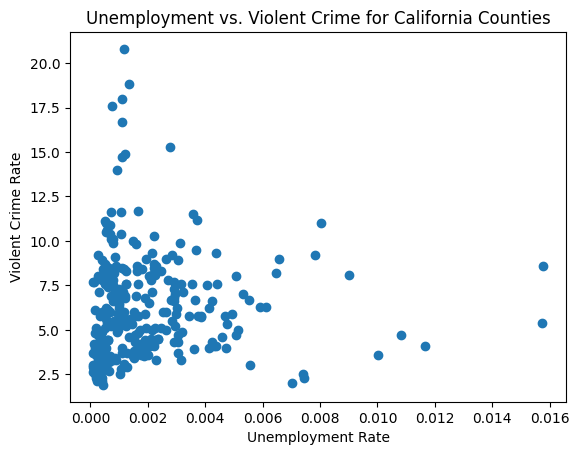

In [67]:
# plot data
plt.scatter(clean_data.violent_crime_rate, clean_data.unemployment)
plt.title("Unemployment vs. Violent Crime for California Counties")
plt.xlabel("Unemployment Rate")
plt.ylabel("Violent Crime Rate")

In [65]:
X = clean_data[['year', 'unemployment']].astype(float)
y = clean_data['violent_crime_rate']